Connect to Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Load and Devide Data

Load Data

In [0]:
%cd /content
!unzip /content/drive/"My Drive"/New2.zip

In [0]:
import os
def getFolder(path= '/content/New2'):
  listLeaf = {}
  for folders in os.listdir(path):
    id, name = folders.split('-')
    listLeaf[int(id)] = name
  return listLeaf

Divide Data

In [0]:
%cd /content
import cv2 as cv 
import numpy as np
import os
import random
import math
import matplotlib.pyplot as plt
import csv 
from sklearn.utils import shuffle
import glob

def loadData(files, path='New2'):
  data = []
  for file in files.readlines():
    id = file.strip().split('-',1)[0]
    pathname = path + '/'+ file.strip()
    try:
      # print(id, pathname)
      image = cv.imread(pathname)
      image = cv.resize(image, (128,128))
      
      data.append([image, int(id)])
    except:
      pass
  return data
x_train = []
y_train = []
x_test = []
y_test = []
x_val =  []
y_val =  []
with open('/content/drive/My Drive/train2.txt', 'r') as trains:
  trainData = loadData(trains)
trains.close()
with open('/content/drive/My Drive/val2.txt', 'r') as vals:
  testData1 = loadData(vals)
vals.close()
with open('/content/drive/My Drive/test2.txt', 'r') as tests:
  testData2 = loadData(tests)
tests.close()
  
# print(dataset)
for features, label in trainData:
    x_train.append(features)
    y_train.append(label)
for features, label in testData1:
    x_test.append(features)
    y_test.append(label)
for features, label in testData2:
    x_val.append(features)
    y_val.append(label)
x_train = np.array(x_train).reshape(-1, 128, 128,3) 
x_test = np.array(x_test).reshape(-1,128, 128,3) 
x_val = np.array(x_val).reshape(-1, 128, 128,3) 

k = np.array(x_train[1]).reshape(128,128,3)
plt.show()
print(x_train.shape, len(y_train))

print(x_val.shape, len(y_val))
print(x_test.shape, len(y_test))
print(os.getcwd())

/content
(36374, 128, 128, 3) 36374
(12124, 128, 128, 3) 12124
(12124, 128, 128, 3) 12124
/content


Save Data

In [0]:
def getTime():
  import datetime
  now = datetime.datetime.now()
  year = now.year
  month = now.month
  day = now.day
  hour = now.hour
  minu = now.minute
  
  return '{}-{}-{}_{}-{}'.format(year, month, day, hour, minu)

import numpy as np
import pickle
import os

path = "/content/drive/My Drive/savedData"
dataFile = "Division128_NEW2-{}.p".format(getTime())
data = {'xTrain': x_train, 'xValidation': x_val, 'xTest': x_test,
        'yTrain': y_train, 'yValidation': y_val, 'yTest': y_test}
pickle.dump(data, open(os.path.join(path, dataFile), 'wb'))

print("saved data: ", dataFile)

saved data:  Division128_NEW2-2019-11-27_3-57.p


# Train Data

Load Saved Data

Text(20, 62, '46')

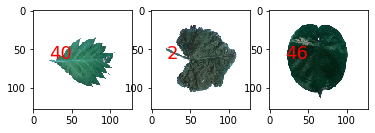

In [0]:
import os 
import pickle 
import matplotlib.pyplot as plt


def Load(dataFile):
  with open(dataFile, mode='rb') as f:
    data = pickle.load(f)

    xTrain = data['xTrain']
    xVal = data['xValidation']
    xTest = data['xTest']
    yTrain = data['yTrain']
    yVal = data['yValidation']
    yTest = data['yTest']
  return xTrain, yTrain, xTest, yTest, xVal, yVal

path = "/content/drive/My Drive/savedData"
nameFile = "Division128_NEW2-2019-11-27_3-57.p"

x_train, y_train, x_test, y_test, x_val, y_val = Load(os.path.join(path, nameFile))
plt.subplot(1,3,1)
plt.imshow(x_train[0].reshape(128,128,3), 'gray')
plt.text(20, 62,y_train[0],color='red',fontsize=18)
plt.subplot(1,3,2)
plt.imshow(x_test[0].reshape(128,128,3), 'gray')
plt.text(20, 62,y_test[0],color='red',fontsize=18)
plt.subplot(1,3,3)
plt.imshow(x_val[0].reshape(128,128,3), 'gray')
plt.text(20, 62,y_val[0],color='red',fontsize=18)

In [0]:
from __future__ import print_function
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import TensorBoard
import os
import os
import numpy as np

num_classes = 51

def leafModel(inputShape = (128, 128,3), num_class = 60):

  model = Sequential()
  
  # Block 0
  model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', 
                   name='cv0',
                   input_shape=inputShape, padding="same"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=2))

  # Block 1
  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                   name='cv1', padding="same"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=2))

  # # block 2
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
                   name='cv2', padding="same"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=2))
  #block3
  model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', 
                   name='cv3', padding="same"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=2))
  #block4
  model.add(Conv2D(filters= 256, kernel_size=(3, 3), activation='relu', 
                   name='cv4', padding="same"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=2))
  #block5
  model.add(Conv2D(filters= 128, kernel_size=(3, 3), activation='relu', 
                   name='cv5', padding="same"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=2))
  #block6
  model.add(Conv2D(filters= 256, kernel_size=(1, 1), activation='relu', 
                   name='cv6', padding="same"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=2))
  model.add(Conv2D(filters= 64, kernel_size=(1, 1), activation='relu', 
                   name='cv7', padding="same"))

  # binary 'classifier'
  model.add(Flatten())
  # model.add(Dense(units=512,activation='relu', name = 'hiddenlayer1'))
  # model.add(Dense(units=128,activation='relu', name = 'hiddenlayer2'))
  model.add(Dense(num_class))
  model.add(Activation('softmax'))
  # Optimizer
  adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
  
  return model, 'leafModel50'

model, nameModel = leafModel(num_class=num_classes)
model.summary()

Using TensorFlow backend.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cv0 (Conv2D)                 (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
cv1 (Conv2D)                 (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
cv2 (Conv2D)                 (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
____________________

In [0]:
import os
import numpy as np


batch_size = 32

epochs = 300
num_predictions = 20


xTrain1 = x_train.astype('float32')
xVal1 = x_val.astype('float32')
xTrain1 /=255
xVal1 /=255

yTrain1 = keras.utils.to_categorical(y_train, num_classes)
yVal1 = keras.utils.to_categorical(y_val, num_classes)

Model = model.fit(xTrain1, yTrain1,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(xVal1, yVal1),
              shuffle=True,
             #callbacks=[tensorboard]
             )

# Score trained model.
scores = model.evaluate(xTrain1, yTrain1, verbose=1)
print('Train loss:', scores[0])
print('Train accuracy:', scores[1])




Train on 36374 samples, validate on 12124 samples
Epoch 1/300





36374/36374 [==============================] - 29s 797us/step - loss: 0.0576 - acc: 0.9845 - val_loss: 0.0222 - val_acc: 0.9920
Epoch 2/300
36374/36374 [==============================] - 19s 525us/step - loss: 0.0164 - acc: 0.9941 - val_loss: 0.0131 - val_acc: 0.9952
Epoch 3/300
36374/36374 [==============================] - 19s 519us/step - loss: 0.0094 - acc: 0.9966 - val_loss: 0.0078 - val_acc: 0.9973
Epoch 4/300
36374/36374 [==============================] - 19s 529us/step - loss: 0.0068 - acc: 0.9976 - val_loss: 0.0069 - val_acc: 0.9976
Epoch 5/300
36374/36374 [==============================] - 19s 511us/step - loss: 0.0057 - acc: 0.9980 - val_loss: 0.0058 - val_acc: 0.9980
Epoch 6/300
36374/36374 [==============================] - 18s 503us/step - loss: 0.0049 - acc: 0.9983 - val_loss: 0.0064 - val_acc: 0.9979
Epoch 7/300
36374/36374 [==============================] - 19s 511us/step - loss: 0.0041 - acc: 0.9986

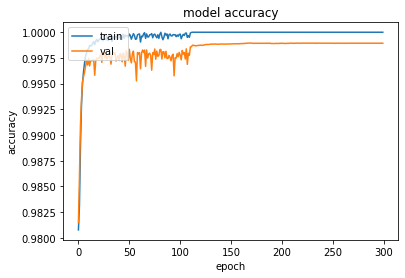

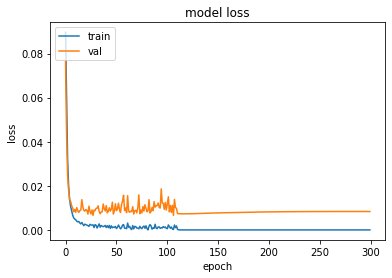

In [0]:
plt.plot(Model.history['acc'])
plt.plot(Model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()
plt.figure()
plt.gcf().clear()
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [0]:
model_name = 'leaf50_NEW-CNN.h5'
save_dir = os.path.join(os.getcwd()+"/drive/My Drive", 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/saved_models/leaf50_NEW-CNN.h5 


## Test Data

In [0]:
import keras
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# listLeaf = getFolder()
num_classes = 51
name = "leaf50_NEW-CNN.h5"
classifier = load_model("/content/drive/My Drive/saved_models/" + name)

xTest1 = x_test.astype('float32')
xTest1 /=255
yTest1 = keras.utils.to_categorical(y_test, num_classes)

scores = classifier.evaluate(xTest1, yTest1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

3031/3031 [==============================] - 1s 226us/step
Test loss: 0.01036468269230992
Test accuracy: 0.9986932605101857


Số cây lỗi: 102


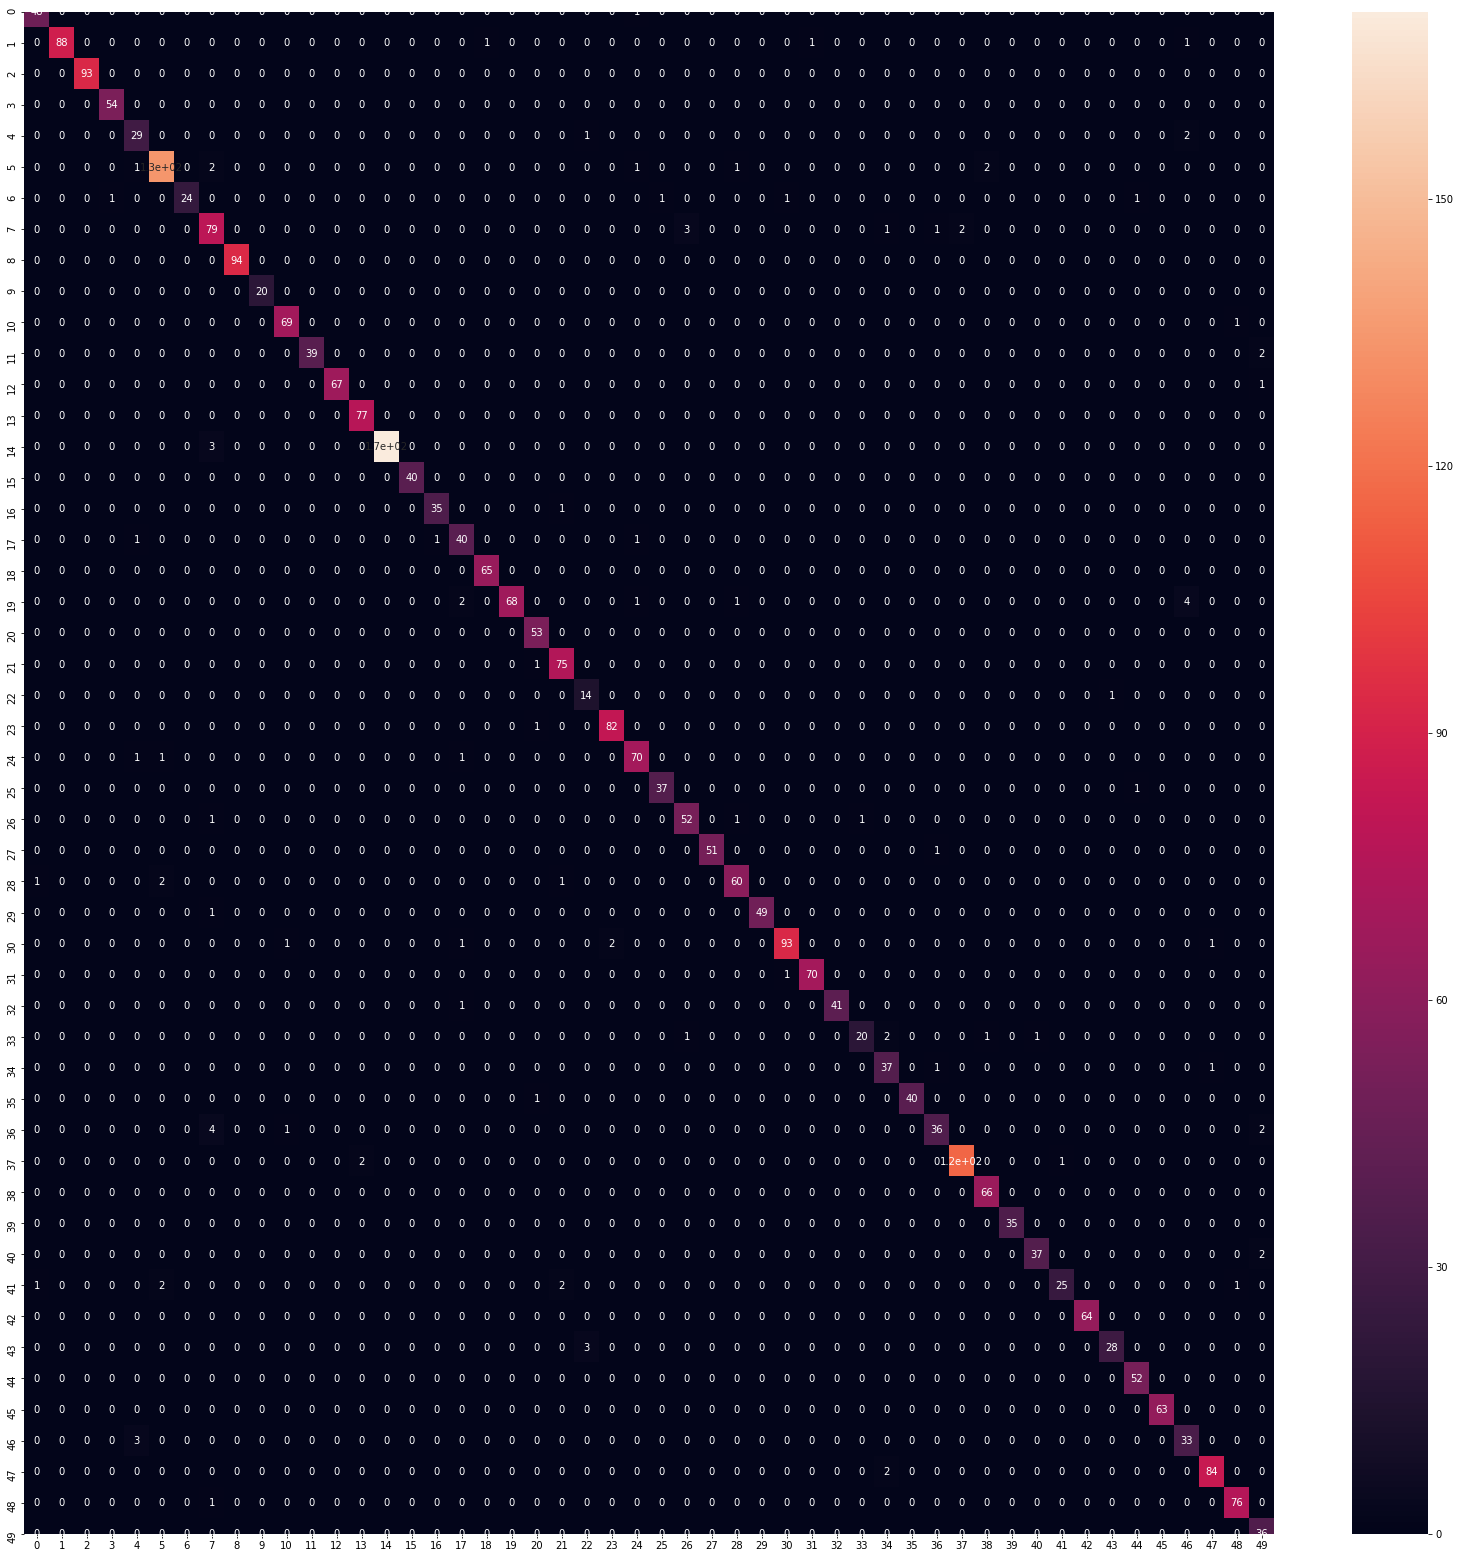

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

prediction1 = classifier.predict(xTest1,batch_size=None,steps=1)
pred = []
count = 0
for index, value in enumerate(prediction1):
  p = np.argmax(value)
  pred.append(p)
  if np.argmax(value) != y_test[index]:
    count += 1
print('Số cây lỗi: {}'.format(count))

cm=confusion_matrix(y_test,pred)
# print(cm)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (28,28))
sn.heatmap(df_cm, annot=True)